In [21]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
sns.set()

from rbm import *

In [22]:
def lire_alpha_digit(data,arg):
    """Read digits from dataset

    Parameters
        Input data
            data: np.array 
        Argument of digits to be read
            arg: List[int]
    """
    n_pixels=data[0][0].shape[0]*data[0][0].shape[1]
    n_examples=data.shape[1]

    a=np.zeros((len(arg)*n_examples,n_pixels))
    for i in range(len(arg)):
        for j in range(n_examples):
            a[i*n_examples+j,:]=data[arg[i]][j].flatten()
    return a

In [23]:
def plot_data(data,nx,ny):
    """Plots the numbers in a grid of dimension (nx,ny)

    Parameters
        Input data
            data: np.array(n,320)
        Number of digits in nx dimension
            nx: int
        Number of digits in ny dimension
            ny: int
    """
    plt.figure(figsize=(ny,nx)) ## Create figure
    for i in range(nx*ny):
        plt.subplot(nx,ny,i+1)
        plt.imshow(np.reshape(data[i],(20,16)))
        plt.xticks([], [])
        plt.yticks([], [])
    plt.show()

In [24]:
def plot_data_out(data,nx,ny):
    """Plots the numbers in a grid of dimension (nx,ny)

    Parameters
        Input data
            data: np.array(n,20,16)
        Number of digits in nx dimension
            nx: int
        Number of digits in ny dimension
            ny: int
    """
    plt.figure(figsize=(ny,nx)) ## Create figure
    for i in range(nx*ny):
        plt.subplot(nx,ny,i+1)
        plt.imshow(data[i])
        plt.xticks([], [])
        plt.yticks([], [])
    plt.show()

In [25]:
#Load AlphaDigits dataset
data_s = sp.io.loadmat('binaryalphadigs.mat')['dat']

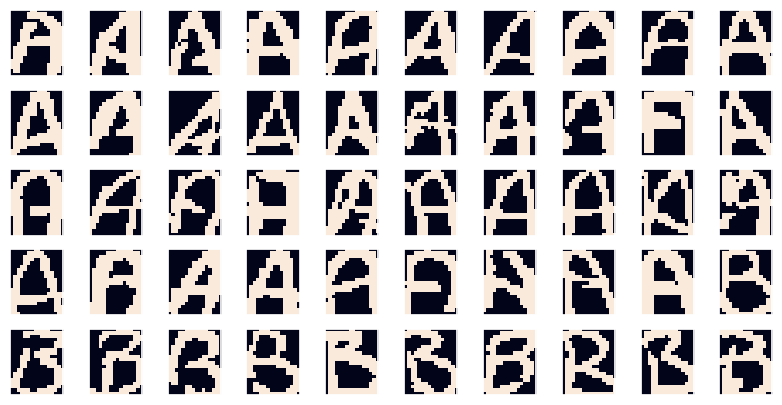

In [26]:
#Select training data from dataset and visualize
arg=[10,11,12]
data = lire_alpha_digit(data_s,arg)
plot_data(data,5,10)

In [7]:
#Dimension of visible variables (Number of pixels)
p=320

#Dimension of hidden variables
q=50

#Define and train RBM
rbm=RBM(p,q)
rbm.train_RBM(data, eps=0.1, nb_epoch=100, taille_batch=4)

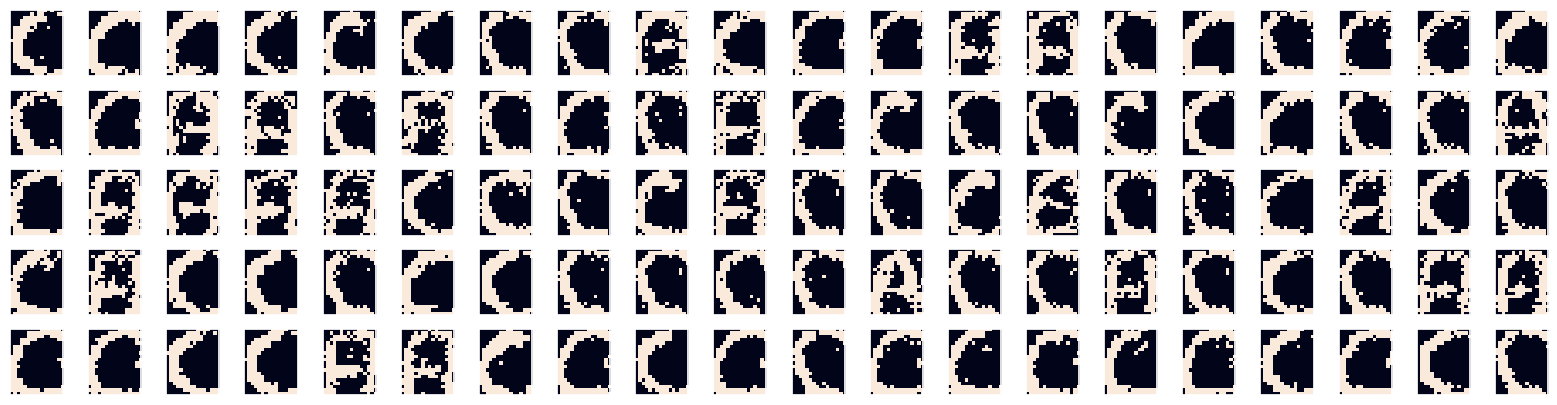

In [8]:
#Generate new data from RBM and visualize
data_gen=rbm.generer_image_RBM(100, nb_iter_gibbs=1000)
plot_data_out(data_gen,5,20)

# Analysing the Reconstruction Error 

### With respect to the dimension of $q$

In [29]:
# Number of characters to train model on
characters = [1,2,5,10,15]

results = []
for i in characters:
    #Load training data
    data_carac = list(range(10,10+i))
    data_train = lire_alpha_digit(data_s,data_carac)

    #Training different models with varying dimensions
    for q in range(10,150,10):
        #Define and Train model
        rbm=RBM(320,q)
        rbm.train_RBM(data_train, eps=0.1, nb_epoch=50, taille_batch=4)

        #Generate output and calculate error
        data_output = rbm.sortie_entree(rbm.entree_sortie(data_train))
        error = np.mean(np.power(data_train - data_output,2))
        results.append([error, i, q])

<AxesSubplot: xlabel='Dimension of q', ylabel='Reconstruction Error'>

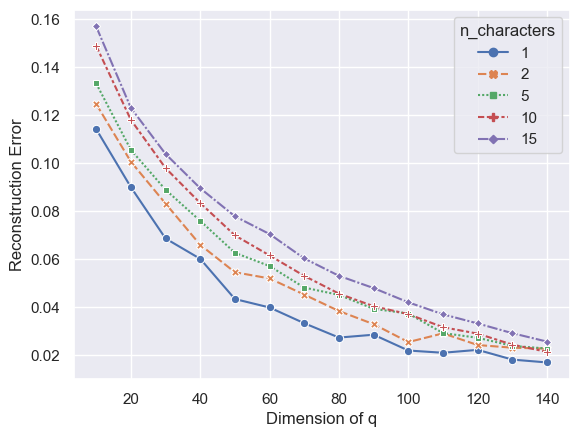

In [30]:
df = pd.DataFrame(np.array(results), columns=['Reconstruction Error', 'n_characters', 'Dimension of q'])
df['n_characters'] = df['n_characters'].astype('int').astype('str')

sns.lineplot(data=df, x='Dimension of q', y='Reconstruction Error', hue='n_characters', style='n_characters', markers=True, dashes=True)

### With respect to batch size

In [31]:
# Number of characters to train model on
characters = [1,2,5,10,15]

results = []
for i in characters:
    #Load training data
    data_carac = list(range(10,10+i))
    data_train = lire_alpha_digit(data_s,data_carac)

    #Training different models with varying dimensions
    for batch_size in range(10,150,10):
        #Define and Train model
        rbm=RBM(320,100)
        rbm.train_RBM(data_train, eps=0.1, nb_epoch=50, taille_batch=batch_size)

        #Generate output and calculate error
        data_output = rbm.sortie_entree(rbm.entree_sortie(data_train))
        error = np.mean(np.power(data_train - data_output,2))
        results.append([error, i, batch_size])

<AxesSubplot: xlabel='Batch Size', ylabel='Reconstruction Error'>

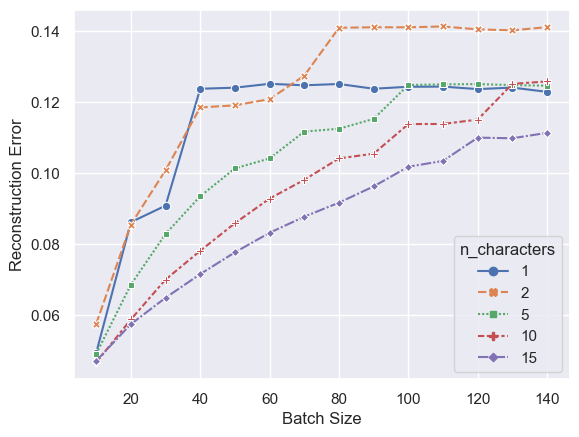

In [32]:
df = pd.DataFrame(np.array(results), columns=['Reconstruction Error', 'n_characters', 'Batch Size'])
df['n_characters'] = df['n_characters'].astype('int').astype('str')

sns.lineplot(data=df, x='Batch Size', y='Reconstruction Error', hue='n_characters', style='n_characters', markers=True, dashes=True)

# Modeling power when varying the number of characters during training

In [55]:
args=[[10], [10,11], [10,11,12], [10,11,12,13,14], [10,11,12,13,14,15,16,17,18,19]]

results = []

for arg in args:
    data = lire_alpha_digit(data_s,arg)
    rbm=RBM(320,50)
    rbm.train_RBM(data, eps=0.1, nb_epoch=100, taille_batch=10)
    results.extend(rbm.generer_image_RBM(10, nb_iter_gibbs=1000))


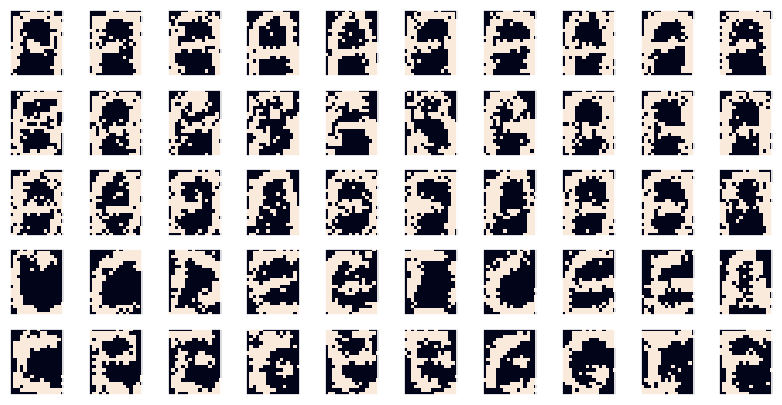

In [57]:
plot_data_out(results,5,10)

# Results on MNIST

In [9]:
mnist = datasets.fetch_openml('mnist_784')

In [15]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy().astype('int')

In [18]:
def get_mnist_digits(X, y, digits=[0]):
    idx = np.where(np.isin(y, np.array(digits)))[0]
    return X[idx], y[idx]

digits = get_mnist_digits(X, y, digits=[0])[0]
digits_bin = (digits > 128) * 1

X_train, X_test = train_test_split(digits_bin, train_size=0.3, shuffle=True)
X_train.shape, X_test.shape

((2070, 784), (4833, 784))

In [ ]:
rbm.generer_image_RBM(10, nb_iter_gibbs=1000)